In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
data.drop(columns=['area_type','availability','society','balcony'],axis=1,inplace=True)

In [6]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Here Droping rows with null values because we have the 13335 rows 

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
data['bhk']=data['size'].apply(lambda x:  int(x.split(' ')[0]))
data.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [13]:
data[data['bhk']>=20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


So,here we can see the 43 bearooms are not fit in the 2400 sqft these type of the error we can remove

Now we are doing on the total_sqft columns to extracting the different type of the data rows

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
data[~data['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
data['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13246 non-null  object
dtypes: object(1)
memory usage: 207.0+ KB


In [19]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
       return float(x)
    except:
        return None


In [20]:
df1=data.copy()
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft_to_num)
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df1['total_sqft'].info()

<class 'pandas.core.series.Series'>
Index: 13246 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype  
--------------  -----  
13200 non-null  float64
dtypes: float64(1)
memory usage: 207.0 KB


In [22]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [24]:
df2=df1.copy()
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df2.location.unique())

1304

So here the location has the total 1304 unique suppose when we convert into the onehotencoding it will creates total 1304 columns that's go be huge set
here we reduce the dimensity 

In [27]:
df2.location=df2.location.apply(lambda x: x.strip())


In [28]:
location_status=df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
location_status_less_than_10=location_status[location_status<=10]
location_status_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [30]:
len(df2.location.unique())

1293

In [31]:
df2.location=df2.location.apply(lambda x: 'other' if x in location_status_less_than_10 else x)
len(df2.location.unique())

242

In [32]:
df2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [33]:
location=df2.groupby('location')['location'].agg('count')
location

location
1st Block Jayanagar            14
1st Phase JP Nagar             25
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           24
5th Block Hbr Layout           12
                             ... 
Yelahanka                     210
Yelahanka New Town             41
Yelenahalli                    13
Yeshwanthpur                   85
other                        2881
Name: location, Length: 242, dtype: int64

In [34]:
df2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [35]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.300163,2.692586,112.389392,2.801902,7.920769e+03
std,1237.323344,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [36]:
df2.duplicated().sum()

1051

In [37]:
df2.shape

(13246, 7)

Removing Outliyers

In [39]:
df2[df2.total_sqft/df2.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [40]:
df2.shape

(13246, 7)

In [41]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(12502, 7)

In [42]:
df3.price_per_sqft.describe()

count     12456.000000
mean       6308.513707
std        4168.123545
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

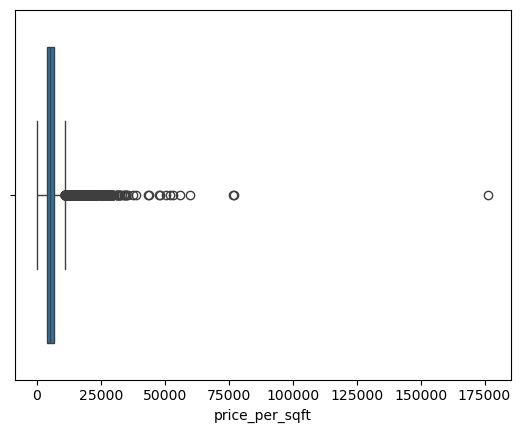

In [43]:
sns.boxplot(x='price_per_sqft',data=df3)
plt.show()

C:\Users\VILAS\AppData\Local\Temp\ipykernel_13372\222682766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.price_per_sqft)


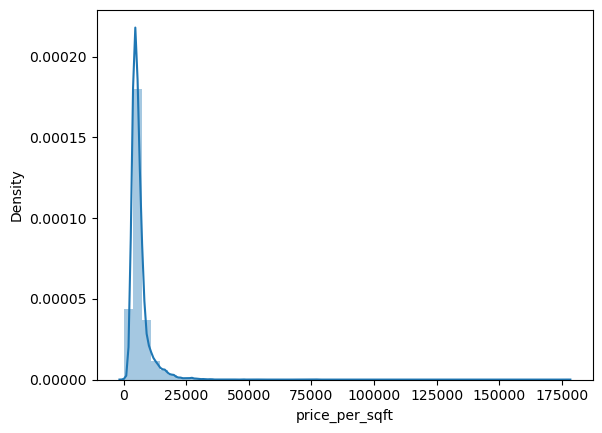

In [44]:
sns.distplot(df3.price_per_sqft)
plt.show()

In [45]:
q1=df3['price_per_sqft'].quantile(0.25)
q3=df3['price_per_sqft'].quantile(0.75)

In [46]:
iqr=q3-q1

In [47]:
min_range=q1-(1.5*iqr)
max_range=q3+(1.5*iqr)
min_range,max_range

(151.3157894736828, 10975.877192982458)

In [48]:
d=df3[(df3['price_per_sqft']>min_range) & (df3['price_per_sqft']<=max_range)]
d.shape

(11453, 7)

In [49]:
d.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11453.000000,11453.000000,11453.000000,11453.000000,11453.000000
mean,1519.025695,2.468960,85.398212,2.571641,5413.475841
std,1201.852267,0.987178,69.505921,0.908419,1758.551646
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1100.000000,2.000000,47.500000,2.000000,4123.711340
50%,1276.000000,2.000000,65.000000,2.000000,5100.956429
75%,1639.000000,3.000000,98.860000,3.000000,6412.478336
max,52272.000000,16.000000,2100.000000,16.000000,10967.098704


In [50]:
def remove_pps_outliyer(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))  & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4=remove_pps_outliyer(df3)
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [51]:
df4.shape

(10241, 7)

In [52]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.874292,2.474075,90.982730,2.572210,5657.713269
std,876.715776,0.981338,86.147549,0.896219,2266.473524
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,67.000000,2.000000,5172.413793
75%,1650.000000,3.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


suppose if same area 2bhk price higher than the 3bhk in this case we have to remove them 

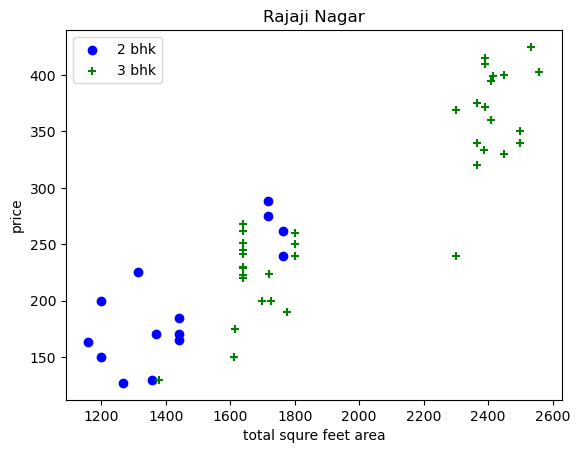

In [54]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location == location) & (df.bhk==2)]
    bhk3=df[(df.location == location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 bhk')
    plt.xlabel('total squre feet area')
    plt.ylabel('price')
    plt.title(location)
    plt.legend()

plot_scatter_chart(df4,'Rajaji Nagar')

In [55]:
df4.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [56]:
for location,location_df in df4.groupby('location'):
    print('location:',location)
    print(location_df)
    break

location: 1st Block Jayanagar
              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163


In [57]:
for bhk,bhk_df in location_df.groupby('bhk'):
    print('bhk:',bhk)
    print(bhk_df)

bhk: 2
              location   size  total_sqft  bath  price  bhk  price_per_sqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
bhk: 3
              location   size  total_sqft  bath  price  bhk  price_per_sqft
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
bhk: 4
              location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163


In [58]:
def  remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5=remove_bhk_outliers(df4)
df5.shape          

(7329, 7)

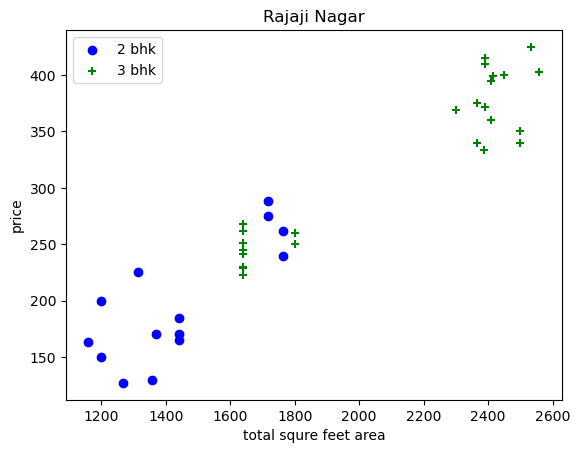

In [59]:
plot_scatter_chart(df5,'Rajaji Nagar')

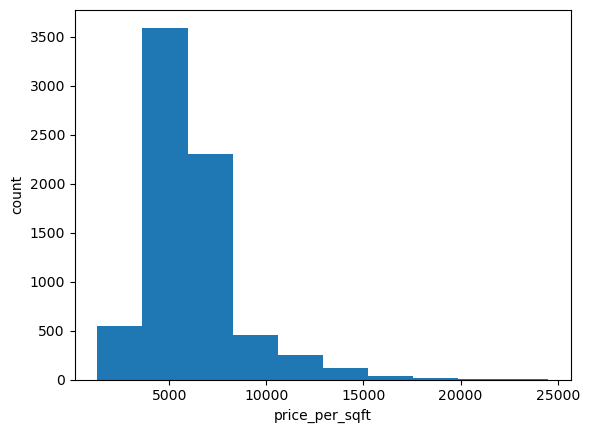

In [60]:
plt.hist(df5.price_per_sqft)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()

In [61]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Now we are removing the bath which higher bath rooms in noraml case we need per room one bathroom but if the number of bedroom higher than then bathroom we can remvoe atleat we have to contina beadroom+2 == bathrooms in this case we are removing bath>bhk+2

In [63]:
df5[df5.bath>df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


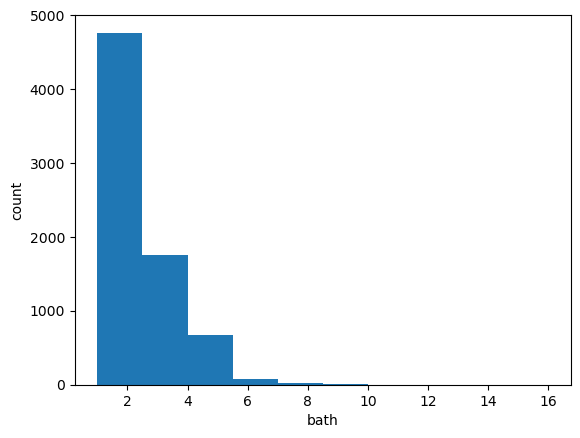

In [64]:
plt.hist(df5.bath)
plt.xlabel('bath')
plt.ylabel('count')
plt.show()

In [65]:
df6=df5[df5.bath<df5.bhk+2]

In [66]:
df6.shape

(7251, 7)

In [67]:
df6.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


In [68]:
df6.shape

(7251, 7)

In [69]:
df7=df5[df5.bath<df5.bhk+2]
df7.shape

(7251, 7)

In [70]:
df7.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333


In [71]:
df7.drop(['price_per_sqft','size'],axis='columns',inplace=True)

C:\Users\VILAS\AppData\Local\Temp\ipykernel_13372\3352080632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop(['price_per_sqft','size'],axis='columns',inplace=True)


In [72]:
df7.shape

(7251, 5)

In [73]:
df7.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


Model Fiting

In [75]:
dummy=pd.get_dummies(df7.location)
dummy.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
clean_data=pd.concat([df7,dummy.drop('other',axis='columns')],axis='columns')
clean_data.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
clean_data.drop('location',axis='columns',inplace=True)

In [78]:
clean_data.shape

(7251, 245)

In [79]:
x=clean_data.drop('price',axis='columns')
y=clean_data['price']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
li=LinearRegression()
li.fit(x_train,y_train)


LinearRegression()

In [84]:
li.score(x_test,y_test)*100

85.28798810515501

In [85]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [86]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430315, 0.77166242, 0.85089596, 0.80837716, 0.83653442,
       0.77463666, 0.8472467 , 0.84813859, 0.84493274, 0.85893366])

In [87]:
from sklearn.linear_model import Lasso

In [88]:
las=Lasso()
las.fit(x_train,y_train)

Lasso()

In [89]:
las.score(x_test,y_test)*100

69.13645601165341

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
des=DecisionTreeRegressor()
des.fit(x_train,y_train)

DecisionTreeRegressor()

In [92]:
des.score(x_test,y_test)*100

73.9395362395827

In [93]:
score_table=pd.DataFrame()
score_table['Model']=['LinearRegression','Lasso','DecisionTreeRegresso']
score_table['score']=[li.score(x_test,y_test)*100,las.score(x_test,y_test)*100,des.score(x_test,y_test)*100]
score_table

,Model,score
0,LinearRegression,85.287988
1,Lasso,69.136456
2,DecisionTreeRegresso,73.939536


In [186]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [208]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    X=np.zeros(len(x.columns))
    X[0]=sqft
    X[1]=bath
    X[2]=bhk

    if loc_index >= 0:
        X[loc_index]=1
    return li.predict([X])[0]

In [212]:
predict_price('5th Phase JP Nagar',1000,2,2)

C:\Users\VILAS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.13640172028404

In [216]:
predict_price('5th Phase JP Nagar',1000,2,3)

C:\Users\VILAS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


36.672321632750695

In [228]:
x.columns[8]

'5th Phase JP Nagar'

In [220]:
loc_index=np.where(x.columns=='5th Phase JP Nagar')[0][0]
loc_index

8

In [242]:
clean_data.iloc[:,8]

0        False
1        False
2        False
3        False
4        False
         ...  
10232    False
10233    False
10236    False
10237    False
10240    False
Name: 5th Block Hbr Layout, Length: 7251, dtype: bool

In [248]:
clean_data.iloc[:,0:5]

,total_sqft,bath,price,bhk,1st Block Jayanagar
0,2850.0,4.0,428.0,4,True
1,1630.0,3.0,194.0,3,True
2,1875.0,2.0,235.0,3,True
3,1200.0,2.0,130.0,3,True
4,1235.0,2.0,148.0,2,True
...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,False
10233,1800.0,1.0,200.0,1,False
10236,1353.0,2.0,110.0,2,False
10237,812.0,1.0,26.0,1,False


In [250]:
import pickle
with open('bengaluru_house_price_model.pickle','wb') as f:
    pickle.dump(li,f)

1--> pickle is a Python module used to serialize and save Python objects (like models, lists, dictionaries) to disk.
2--> 'wb' means write in binary mode.
     This creates (or overwrites) a file named bengaluru_house_price_model.pickle.
     with ensures the file is automatically closed after saving.
3--> li is your trained Linear Regression model.
     This converts the model object into binary format and writes it to the file.

In [254]:
import json
columns= { 
    'data_columns' : [col.lower() for col in x.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))